# Исследование закономерностей, определяющих успешность игры


# Задачи проекта
Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры 
# Выводы по проекту
Выявлены параметры, определяющие успешность игры в разных регионах мира. На основании этого подготовлен отчет для магазина компьютерных игр для планирования рекламных кампаний. Проведена предобработка данных, анализ. Выбран актуальный период для анализа. Составлены портреты пользователей каждого региона. Проверены гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
средние пользовательские рейтинги жанров Action и Sports разные. При анализе использовал критерий Стьюдента для независимых выборок.
# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
Инструкция по выполнению проекта

Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными

### Файл с данными, общая информация. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-info">
<b> На первый взгляд отметим некорректное название столбцов, в данных есть пропуски. Больше всего пропусков в столбцах 'Critic_Score', 'User_Score', 'Rating'

### Предобработка данных

#### Приведем название столбцов к нижнему регистру

In [3]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Типы данных

In [4]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

<div class="alert alert-block alert-info">
<b> В стобце года выпуска заменим тип данных float64 на Int64

In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

<div class="alert alert-block alert-info">
<b> Столбец user_score должен иметь тип данных float64, но содержит строковые значения 'tbd', поэтому тип данных в столбце object. TBD - аббревиатура от английского To Be Determined (будет определено). Возможны и другие расшифровки аббревиатуры TBD - The Big Duck, Triangular Barrier Diode или Too Bad, Dude, но первый вариант кажется самым реалистичным. 'tbd' значит, что данных пока еще нет, поэтому можем смело заменить 'tbd' на 'None'

In [6]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
data.loc[data['user_score'] == 'tbd']['user_score'].count()

2424

In [8]:
data['user_score'] = data['user_score'].replace({'tbd': None})
data['user_score'] = data['user_score'].astype('float64')

#### Переведем 100 бальную шкалу critic_score в 10 бальную

In [9]:
data['user_score'] = data['user_score']*10

In [10]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Обработка дубликкатов

In [11]:
data.duplicated().sum() #проверяем есть ли явные дубликаты в данных

0

In [12]:
# а что с неявными?
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [13]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [14]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

<div class="alert alert-block alert-info">
<b> Дубликатов нет, какое счастье)

#### Работа с пропусками

In [15]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [16]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [17]:
data.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [18]:
data.query('year_of_release.isna()').sort_values(by='na_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,85.0,E
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,82.0,T
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,79.0,E10+
...,...,...,...,...,...,...,...,...,...,...,...
11000,Demon Chaos,PS2,<NA>,Action,0.00,0.00,0.09,0.00,NaN,NaN,NaN
10837,Egg Monster Hero,DS,<NA>,Role-Playing,0.00,0.00,0.09,0.00,NaN,NaN,E
15022,Umineko no Naku Koro ni San: Shinjitsu to Gens...,PS3,<NA>,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
10764,Luminous Arc 2 (JP sales),DS,<NA>,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-info">
<b> В столбцах 'name', 'year_of_release', 'genre' содержаться категориальные значения, поэтому пропуски в этих  переменных не сможем чем-то заполнить. Продажи в этих столбцах с пропусками не превышают 4,26 млн, поэтому остается только избавиться от таких строк с пропусками.

In [19]:
data = (data.dropna(subset=['name']).reset_index(drop=True))
data = (data.dropna(subset=['year_of_release']).reset_index(drop=True))
data = (data.dropna(subset=['genre']).reset_index(drop=True))
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

<div class="alert alert-block alert-info">
<b> В столбце 'rating' пропуски могут быть связаны с тем, что игра не оценивалась ESRB. Поскольку пропусков довольно много заменим отсутствующие значения на not determined ('nd')

In [20]:
data['rating'] = data['rating'].fillna('nd')
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [21]:
data['rating'].value_counts() #частотность использования категорий рейтинга, по отношению к остальным

nd      6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

<div class="alert alert-block alert-info">
<b> Столбцы 'critic_score', 'user_score' с количественными данными заменим на медианные значения в зависимости от жанра

In [22]:
#создаем функцию для заполнения пропусков на медианные значения по категории
def fill_median(data, onwhat, what ):
    for f in data[onwhat].unique():
        data.loc[(data[onwhat] == f) & (data[what].isna()), what] = data.loc[(data[onwhat] == f), what].median()
    return data[what].isna().sum()

In [23]:
fill_median(data, 'genre', 'critic_score')
fill_median(data, 'genre', 'user_score')
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

<div class="alert alert-block alert-info">
<b> Пропуски в категориальных переменных скорее связаны с человеческим фактором. Пропуски в количественных переменных могут быть связаны с тем, что некоторые игры не оценивались критиками или пользователями вовсе.


#### Добавляем в таблицу новый столбец суммарных продаж во всех регионах 

In [24]:
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1) 

In [25]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,77.0,nd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,78.0,nd,31.38


In [26]:
# check 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


### Исследовательский анализ данных

#### Общее представление

<div class="alert alert-block alert-info">
<b> Общая гистограмма для всех числовых значений. 
    
<br> На первый взгляд графики выглядят очень логично. Правда в столбцах продаж по регионам можно увидеть, что суммарное количество продаж находится в диапозоне от 0-10, и совсем не часто встречается более 10 млн продаж. Это может быть связано с тем, что есть небольшое количство очень популярных игр с большим числом продаж

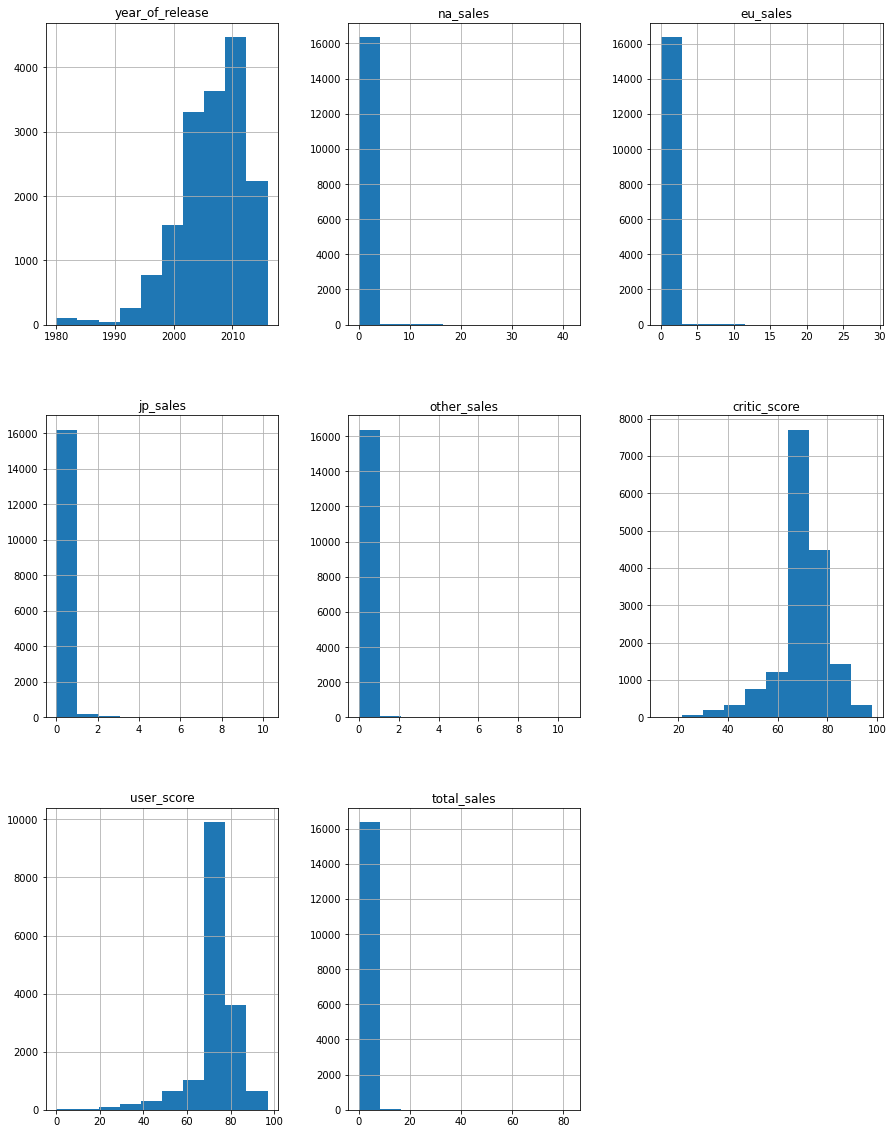

In [27]:
data.hist(figsize=(15, 20)); 

#### Количество выпускаемых игр за разные годы. 

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


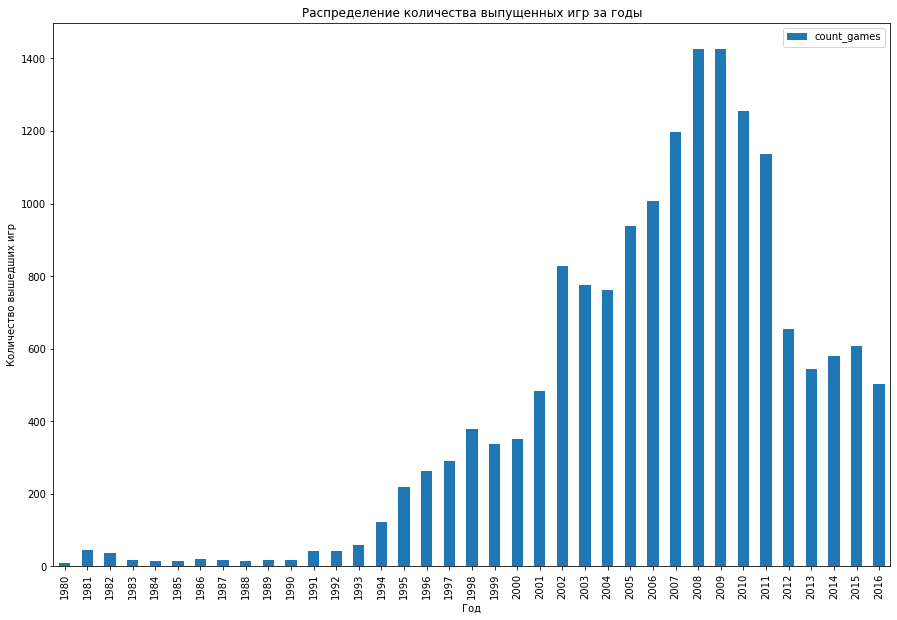

In [29]:
year_count = data.groupby('year_of_release').agg(count_games=('name', 'count')) # группируем данные по году выпуска
ax = year_count.plot(kind='bar', figsize=(15, 10)) #строим график распределения
ax.set_title('Распределение количества выпущенных игр за годы')
ax.set(xlabel='Год', ylabel='Количество вышедших игр')
plt.show()
# можно было построить и гистгормму с числом корзин равному 37 (len(data['year_of_release'].unique()),
# но такой формат мне нравится больше

<div class="alert alert-block alert-info">
<b> На графике выше можем заметить, что рост в производстве игр начинался в 1993 году, это вполне логично, ведь начали появляться новые платформы (консоли). А пик в колчистве выпущенных игр наблюдается в 2008-2009 годах. С 2012 по 2016 можем наблюдать неравномерное снижение выпущенных игр

#### Изменение количества продаж по платформам

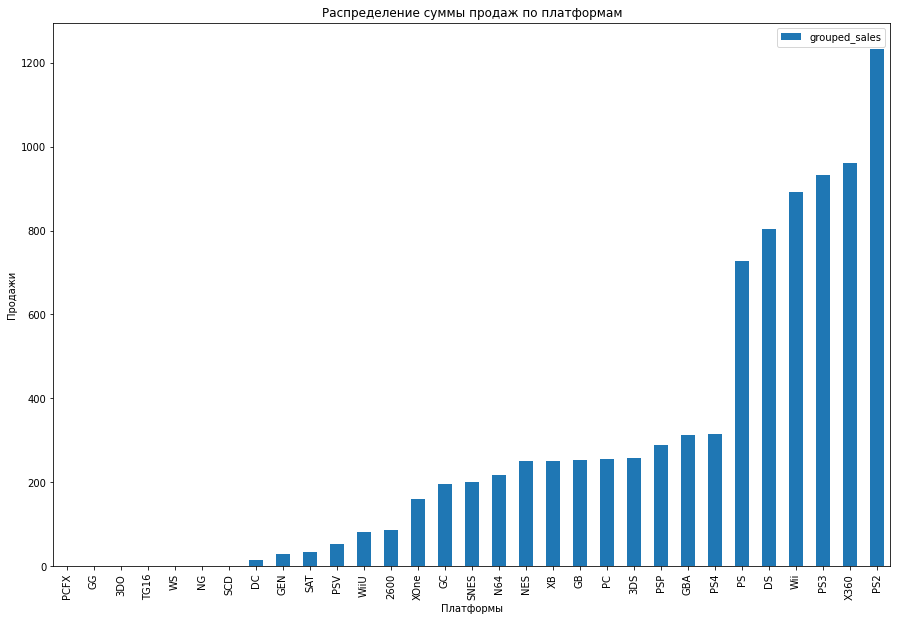

In [30]:
# группируем данные о суммарном количестве продаж на разных платформах
platform_sales = data.groupby('platform').agg(grouped_sales=('total_sales', 'sum')).sort_values(by='grouped_sales')
# распределение суммарных продаж по платформам
ax = platform_sales.plot(kind='bar', figsize=(15, 10))
ax.set_title('Распределение суммы продаж по платформам')
ax.set(xlabel='Платформы', ylabel='Продажи')
plt.show()

In [31]:
# найдем платформы с наибольшими суммарными продажами
platform_sales.sort_values(by='grouped_sales', ascending= False)

,grouped_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


<div class="alert alert-block alert-info">
<b> По графику и обьекту series можем вычислить платформы с наибольшими суммарными продажами. Это 6 платформ, суммарные продажи которых превышают 700 млн: 'PS2','X360', 'Wii', 'PS3', 'DS', 'PS'. Построим распределение по годам

<div class="alert alert-block alert-info">
<b> Удалим выброс на платформе DS в 1985 году

In [32]:

ind = data.query('platform == "DS" & year_of_release == 1985 ').index
data = data.drop(index=ind).reset_index(drop=True)
data.query('platform == "DS" & year_of_release == 1985 ')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


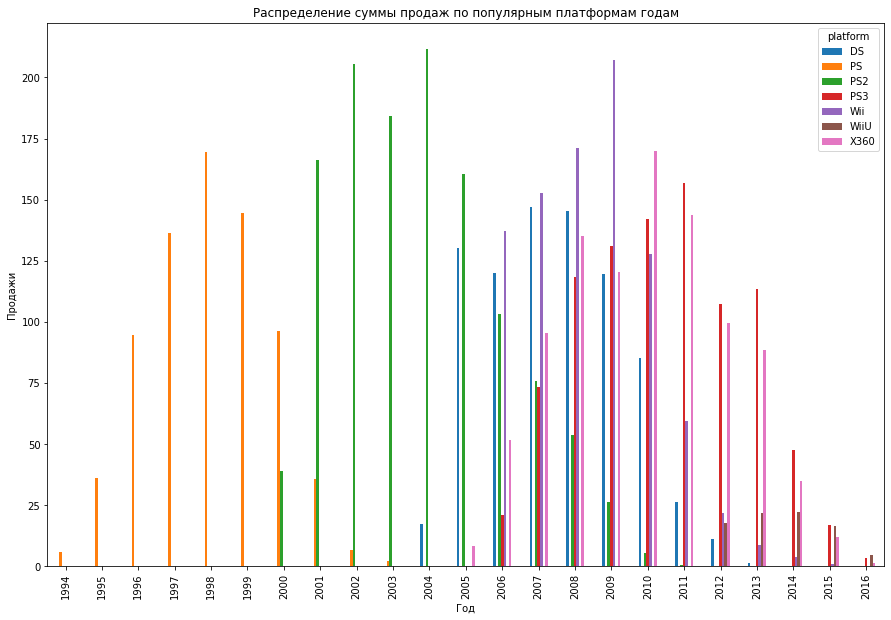

In [33]:
# распределение продаж наиболее популярных платформ по годам на одном графике

popular_platforms = ['PS2','X360', 'Wii', 'PS3', 'DS', 'PS', 'WiiU' ]
popular_platforms_data = data.query('platform.isin(@popular_platforms)')
year_platform_sales = popular_platforms_data.pivot_table(index='year_of_release', columns='platform', 
                    values='total_sales', aggfunc='sum') # создали сводную таблицу зависимости суммарных продаж
                                                          #на популярных платформах за разные годы

ax = year_platform_sales.plot(kind='bar', figsize=(15, 10))
ax.set_title('Распределение суммы продаж по популярным платформам годам')
ax.set(xlabel='Год', ylabel='Продажи')
plt.show()

<div class="alert alert-block alert-info">
<b> На общем графике распределения суммы продаж наиболее популярных платформ по годам можем заметить тенденцию к появлению новых платформ и ухода с рынка старых. Например в 1996-2000 была очень популярна платформа PS, но в 2004 году игры на такую платформу уже не выпускались, самой актуальной платформой в 2004 году стала PS2, но в 2011 ушла с рынка.

<br>Эта диаграмма дает нам общую картину о распределнии, чтобы ответить на вопрос "За какой характерный срок появляются новые и исчезают старые платформы?", построим диаграммы распределения продаж по годам для каждой популярной платформы

In [34]:
popular_platforms_data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91


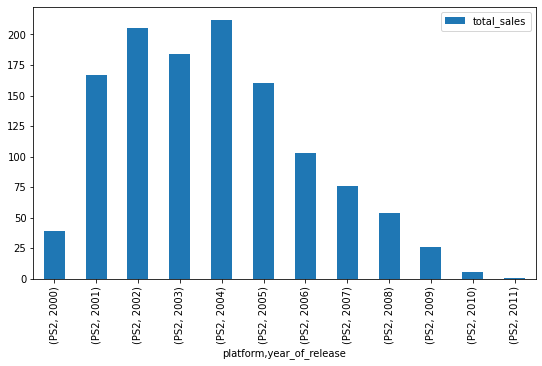

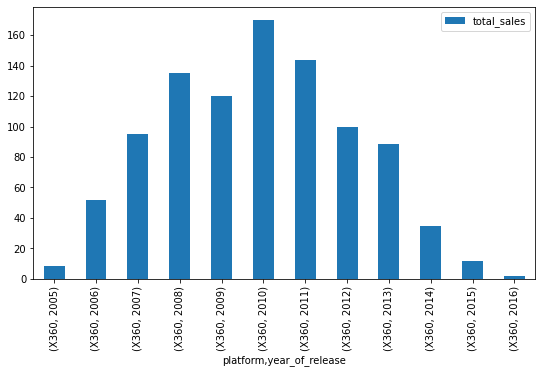

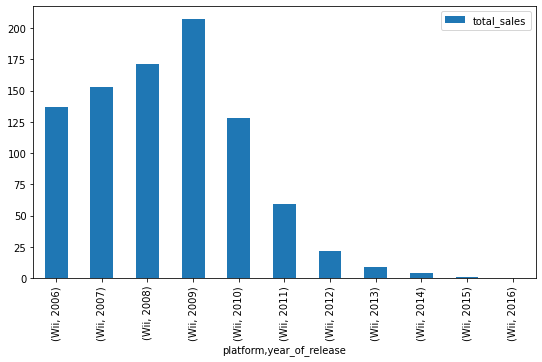

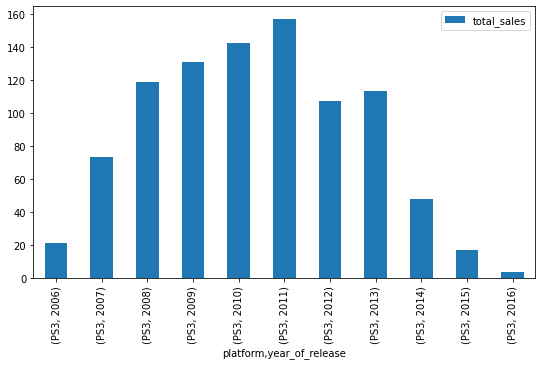

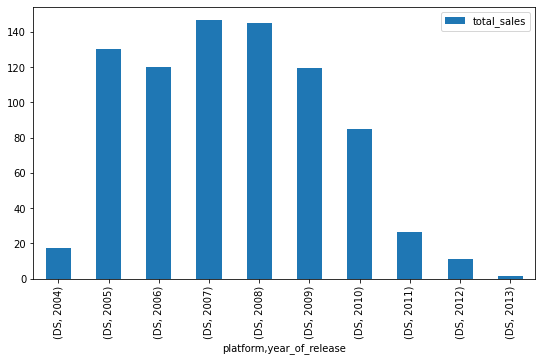

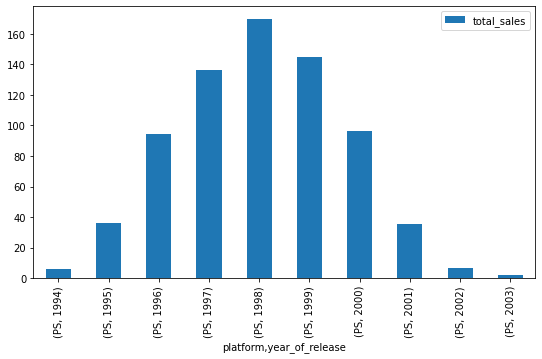

In [35]:

year_platform_sales_PS2_fltr = data.query('platform == "PS2"')
year_platform_sales_X360_fltr = data.query('platform==("X360")')
year_platform_sales_Wii_fltr = data.query('platform==("Wii")')
year_platform_sales_PS3_fltr = data.query('platform==("PS3")')
year_platform_sales_DS_fltr = data.query('platform==("DS")')
year_platform_sales_PS_fltr = data.query('platform==("PS")')
seq1 = ['year_platform_sales_PS2', 'year_platform_sales_X360', 'year_platform_sales_Wii', 'year_platform_sales_PS3',
      'year_platform_sales_DS', 'year_platform_sales_PS']
seq2 = [year_platform_sales_PS2_fltr, year_platform_sales_X360_fltr, year_platform_sales_Wii_fltr, year_platform_sales_PS3_fltr,
      year_platform_sales_DS_fltr, year_platform_sales_PS_fltr]
#year_platform_sales_PS2 = year_platform_sales_PS2_fltr.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
#year_platform_sales_PS2
for j in seq2:
    j = j.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
    j.plot(kind='bar', figsize=(9, 5))

<div class="alert alert-block alert-info">
<b> По следуещем диаграммам распределения можем сказать, что срок жизни платформы составляет от 10 до 12 лет, в среднем получается около 11. Также заметим, что распределение продаж за годы стремиться к норамльному на платформах X360, PS. Остальные распределения больше похожи на Пуассоновские.

<div class="alert alert-block alert-info">
<b>Выбор актуально периода
<br>Для того, чтобы построить корректный прогноз на 2017 год, следует определить актуальный период. Информация об устаревших платформах, таких как PS, на которых больше не выпускают игры, нам не интересна, при этом нам надо собрать достаточно данных, чтобы провести адекватную оценку следующеего года. Для такой динамично меняющейся индустрии, как игровая, было бы достаточно взять данные только за 2016 год, но данные за 2016 не полные. Поэтому предлагаю взять интервал с 2014 - 2016 год для прогнозирования продаж.


In [36]:
data_pred = data.query(' 2014<=year_of_release<= 2016') #данные за актуальные период
data_pred.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,74.0,nd,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,78.0,nd,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.0,74.0,nd,7.98


#### Распределение общих продаж по платформам за актуальный период

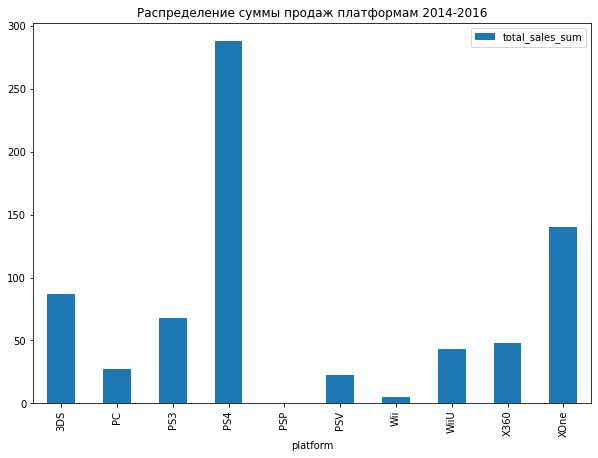

In [37]:

data_pred_table = data_pred.pivot_table(index='platform', values='total_sales', aggfunc=['sum'])
data_pred_table.columns=['total_sales_sum']

ax = data_pred_table.plot( kind='bar', figsize=(10, 7))
ax.set_title('Распределение суммы продаж платформам 2014-2016')
plt.show()

In [38]:
data_pred_table.sort_values(by='total_sales_sum', ascending=False)

,total_sales_sum
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


<div class="alert alert-block alert-info">
<b> На графике распределения суммы продаж по платформам за 2014-2016 года можно отметить 7 платформ - лидеров по прадажам: PS4, XOne, 3DS, WiiU,X360, PS3, PC.

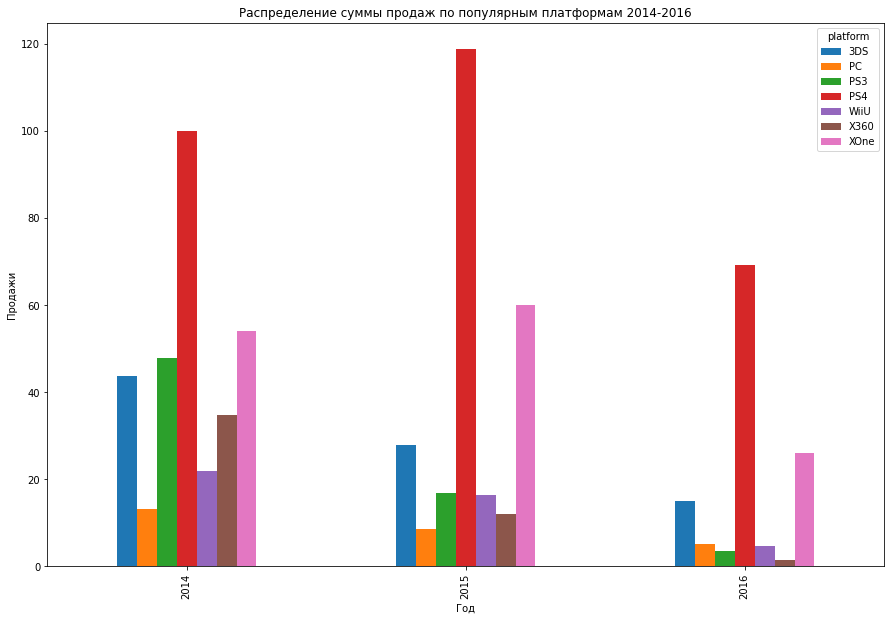

In [39]:
# распределение продаж наиболее популярных платформ за актуальный период на одном графике

popular_platforms_act = ['PS4','XOne', '3DS','PS3','X360', 'WiiU', 'PC' ]
popular_platforms_data_act = data_pred.query('platform.isin(@popular_platforms_act)')
year_act_platform_sales = popular_platforms_data_act.pivot_table(index='year_of_release', columns='platform', 
                    values='total_sales', aggfunc='sum') # создали сводную таблицу зависимости суммарных продаж
                                                          #на популярных платформах за разные годы

ax = year_act_platform_sales.plot(kind='bar', figsize=(15, 10))
ax.set_title('Распределение суммы продаж по популярным платформам 2014-2016')
ax.set(xlabel='Год', ylabel='Продажи')
plt.show()

<div class="alert alert-block alert-info">
<b> На графике распределения суммы продаж по платформам за 2014-2016 года можно увидеть, как изменялись продажи крупных платформ за актуальный период. Явными лидерами продаж на 2016 год становятся платформы PS4 и XOne.
    
<br>    Платформы X360 и PS3 были выпущены в 2006 и 2005 годах, и с 2014 по 2015 продажи на этих платформах значительно уменьшаются, их вытесняют платформы PS4 и XOne. 
    
<br>    Что ж все в мире циклично, одни платформы умирают - другие появляются, постоянным остается только PC. Продажи на PC практически не изменились c 2014 по 2015 год, эту платформу стоит рассматривать, как перспективную. Также отметим, что с 2015-2016 года в тройку лидеров входит платформа 3DS. 
    
<br>    Таким образом, получаем следующие потенциально прибыльные платформы: PS4, XOne, 3DS, PC.  
   

<div class="alert alert-block alert-info">
<b> Построим диаграмму распределения продаж потенциально прибыльных платформ и посмотрим на измнение продаж во времени.

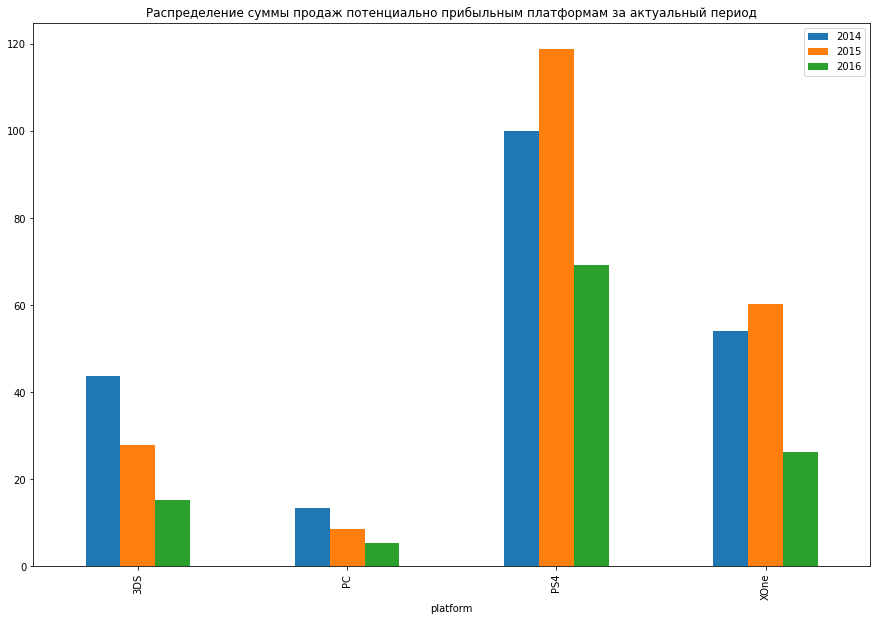

In [40]:
# распределение суммы продаж по потенциально прибыльным платформам за актуальный период
data_pred_table_x_p = (data_pred.query(' (platform == "PS4" | platform == "XOne"|\
platform == "3DS" | platform == "PC") ')\
                       .pivot_table(index='platform',\
                                    columns='year_of_release', values='total_sales', aggfunc=['sum']))
data_pred_table_x_p.columns = ['2014', '2015', '2016']

ax = data_pred_table_x_p.plot(kind='bar', figsize=(15, 10))
ax.set_title('Распределение суммы продаж потенциально прибыльным платформам за актуальный период')
plt.show()

<div class="alert alert-block alert-info">
<b> На графике распределения суммы продаж по наиболее потенциальным платформам во времени заметим, что с 2014 - 2015 года продажи на платформах 3DS, PC уменьшаются в среднем на треть. Рост продаж наблюдается на платформах XOne и PS4. Безусловным лидером продаж становится платформа PS4. Таким образом, круг потенциально прибыльных платформ сужается до двух: XOne и PS4.

#### Диаграмма размаха по глобальным продажам игр в разбивке по платформам

(0.0, 1.75)

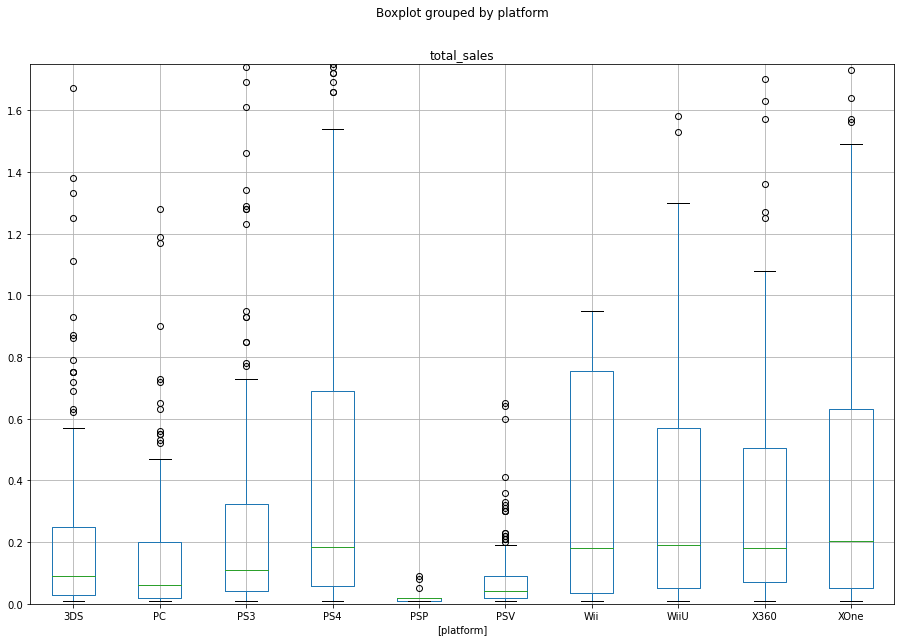

In [41]:
# строим диаграммы размаха для каждой платформы
data_pred.boxplot(column='total_sales', by=['platform'], figsize=(15, 10));
plt.ylim(0, 1.75)

In [42]:
# числовые описания продаж на платформах
data_pred.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


<div class="alert alert-block alert-info">
<b> Межквартильный размах - область ограниченная ящиком (25-72%), медиана находится в ящике (50%), выборка - это область ограниченная усами, и значения за усами - это выбросы. 

<br>    По диаграммам размаха и числовым описаниям, можем сказать наибольшее количество игр за 2014-2016 года вышло на платформе PS4 (376 игры) и PSV (295 игр). При этом второе наибольшее значение медианных продаж у PS4 (0,185 млн), тогда как медианные продажи платформы PSV составляют всего лишь 0.04 млн, и это одно из наименьших колисчтва продаж среди всех платформ. Наибольшее медианное значение продаж у XOne (0.205 млн), хотя за этот период игр вышло в более, чем в 1,5 раза меньшне (228 игр) по сравнению с PS4. Наименьшее колчество продаж на платформе PSP 0.020 млн.

#### Влияние отзывов пользователей и критиков на продажи внутри платформы X360

In [43]:
# фильтруем данные из датасета по одной популярной платформе XOne и актуальному периоду
data_XOne = data.query('platform == "XOne" & 2014<= year_of_release <= 2016')
data_XOne.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,73.0,74.0,nd,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,79.0,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,54.0,M,5.26
241,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,64.0,T,4.49
269,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,62.0,M,4.22


0.39411082807194947

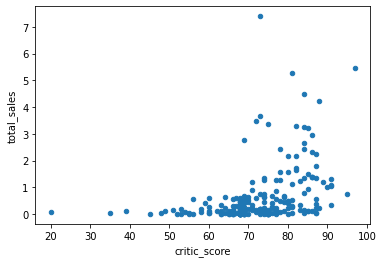

In [44]:
# диаграмма рассеяния и коэффициент корреляции между отзывами критиков и продажами
data_XOne.plot(x='critic_score', y='total_sales', kind='scatter') 
data_XOne['total_sales'].corr(data_XOne['critic_score'])

-0.09853048267615326

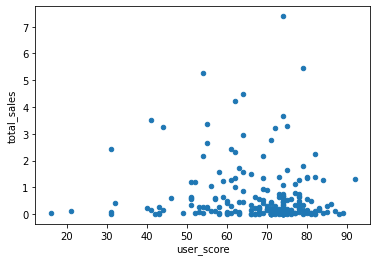

In [45]:
# диаграмма рассеяния и коэффициент корреляции между отзывами пользователей и продажами
data_XOne.plot(x='user_score', y='total_sales', kind='scatter') 
data_XOne['total_sales'].corr(data_XOne['user_score'])

<div class="alert alert-block alert-info">
<b> На диаграмме рассеивания таких параметров, как отзывы критиков и продажи, можно заметить кореллецию данных при оценке критиков больше 70. При оценке меньше 70 корреляции практически нет, об этом говорит и умеренный коэффициент корреляции 0,39. Коэффициент корреляции положительный, при оценке больше 70 прослеживается зависимость: чем больше оценка критика, тем выше продажи.
<br> На диаграмме рассеивания таких параметров, как отзывы пользователей и продажи коэффициент корреляции -0.098 больше -0.1, поэтому можем сделать вывод, что существенной связи между этими параметрами нет, то есть отзывы пользователей не влияют на продажи

#### Влияние отзывов пользователей и критиков на продажи на других платформах

<div class="alert alert-block alert-info">
<b> Для того, чтобы соотнести выводы о влиянии отзывов на продажи по предыдущему пункту, рассмотрим еще одну популярную платформу PS4, чтобы подтвердить результаты

In [46]:
data_PS4 = data.query('platform == "PS4" & 2014<= year_of_release <= 2016')
data_PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,74.0,nd,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.0,74.0,nd,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,57.0,M,7.66


0.34616355123267817

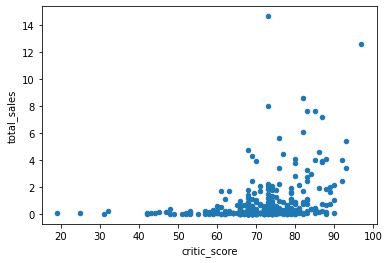

In [47]:
# диаграмма рассеяния и коэффициент корреляции между отзывами критиков и продажами
data_PS4.plot(x='critic_score', y='total_sales', kind='scatter') 
data_PS4['total_sales'].corr(data_PS4['critic_score'])

-0.0670946733789288

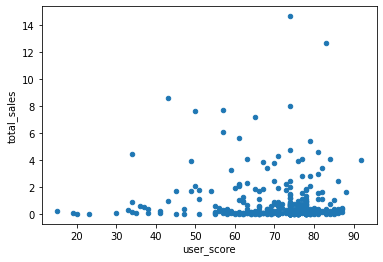

In [48]:
# диаграмма рассеяния и коэффициент корреляции между отзывами пользователей и продажами
data_PS4.plot(x='user_score', y='total_sales', kind='scatter') 
data_PS4['total_sales'].corr(data_PS4['user_score'])

<div class="alert alert-block alert-info">
<b> Диаграммы рассеивания и коэфициенты корреляции между отзывами и продажами на платформе PS4 и XOne очень близки. Напомним, что для XOne корреляция между отзывами критиков, пользователей и продажами составляет соответственно 0,39 и  -0,098, а корреляция между отзывами критиков, пользователей и продажами на платформе PS4 составляет 0,35 и -0,067. Значения получились одних порядков и довольно близкие. Таким образом, можно сделать вывод о том, что при оценках критиков больше 70 прослеживается зависимость между высокой оценкой от критика и увеличением продаж. А оценки пользователей на продажи не влияют.

#### Распределение игр по жанрам

<div class="alert alert-block alert-info">
<b> Интересно посмотреть на распределение игр по жанрам за период 1980-2016 года. Здесь преобладают жанры action, sprts, shooter, role-platying

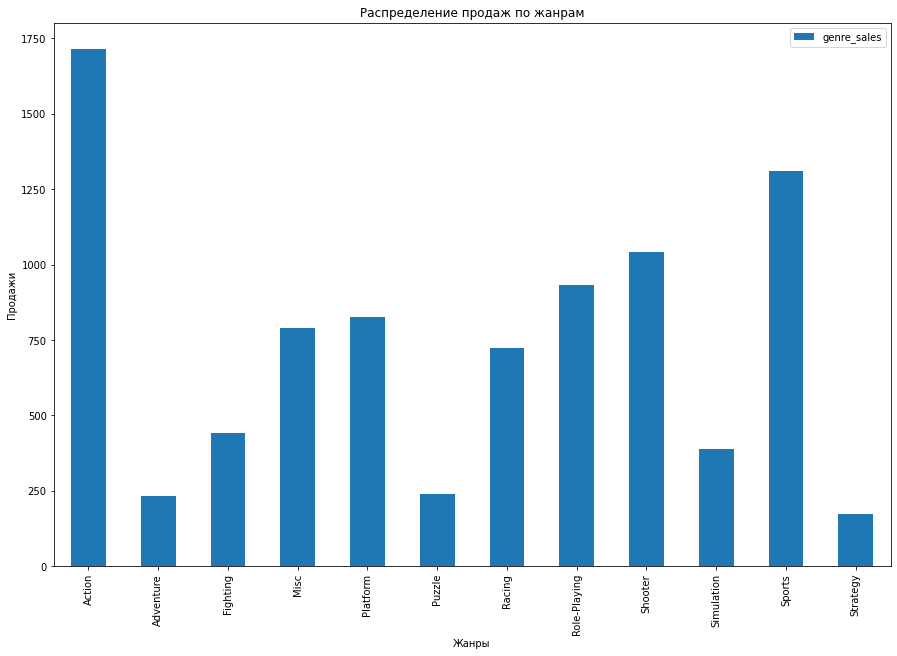

In [49]:
# Распределение продаж по жанрам за весь период
genre_sales = data.groupby('genre').agg(genre_sales=('total_sales', 'sum'))
ax = genre_sales.plot(kind='bar', figsize=(15, 10))
ax.set_title('Распределение продаж по жанрам')
ax.set(xlabel='Жанры', ylabel='Продажи')
plt.show()

<div class="alert alert-block alert-info">
<b> А теперь к важному, построим распределение игр по жанрам за инересующий период период 2014-2016 года. Заметим, что самые популярные, а значит и прибыльные жанры по-прежнему: action, sports, shooter, role-platying. Жанр puzzle так совсем сошел на нет, эх...

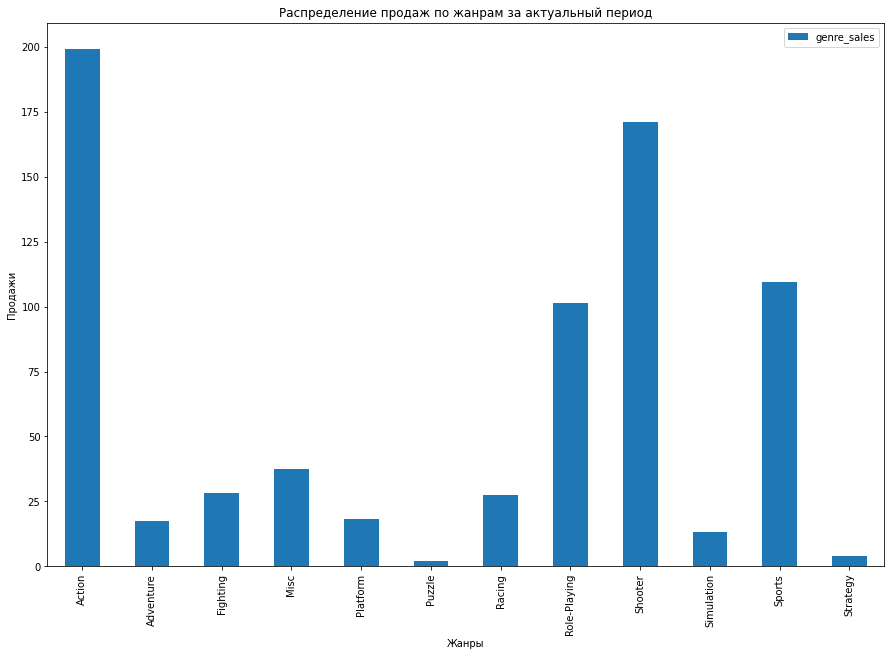

In [50]:
genre_sales_actual = data_pred.groupby('genre').agg(genre_sales=('total_sales', 'sum'))
ax = genre_sales_actual.plot(kind='bar', figsize=(15, 10))
ax.set_title('Распределение продаж по жанрам за актуальный период')
ax.set(xlabel='Жанры', ylabel='Продажи')
plt.show()

<div class="alert alert-block alert-info">
<b> Построим распределение продаж по жанрам на популярных платформах 2014-2016. Интересно какие жанры преобладают на платформах, может определенные жанры соответсвуют конкретным платформам?

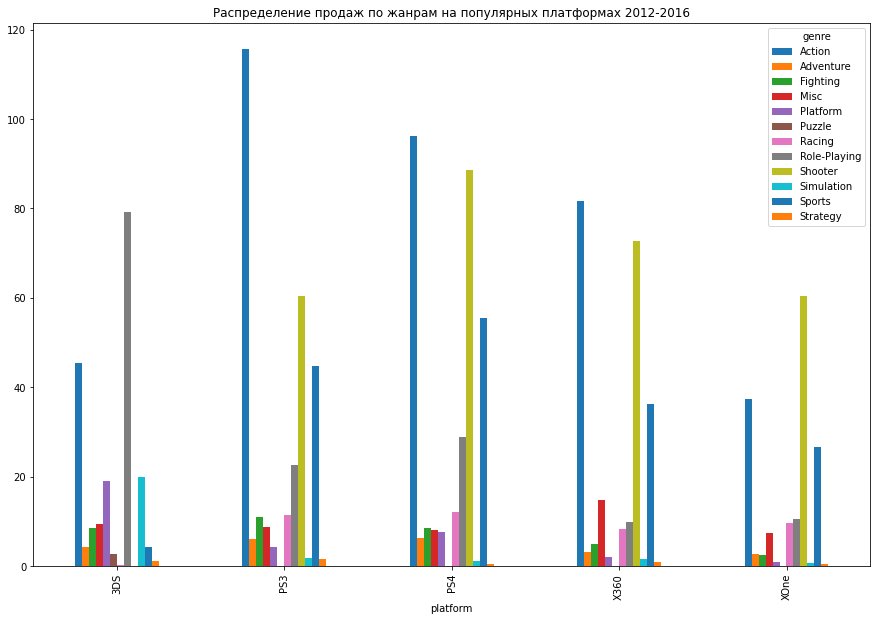

In [51]:
# фильтруем данные по популярным платформам и по году выпуска
data_genre_platform = data.query('(platform == "PS3" |platform == "PS4"| platform == "X360"| platform == "XOne"| platform == "3DS") & (2012<= year_of_release <= 2016) ')
# строим диаграмму распределения
ax = data_genre_platform.pivot_table(index='platform', columns= 'genre', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15, 10))
ax.set_title('Распределение продаж по жанрам на популярных платформах 2012-2016')
plt.show()

<div class="alert alert-block alert-info">
<b> Из всех 5ти платформ выделяется 3DS, здесь преобладает жанр role-playing, чего не скажешь о других платформах. Также на 3DS больше продаж в жанре platform и  simulation, чем на остальных платформах. Видимо, опльзователи ценят эту платформу именно за большое количество игр определенных жанров. На диаграмме также можно проследить преобладание action, sports, shooter, role-platying.

<div class="alert alert-block alert-info">
<b>Проанализируем прибыльность жанров на диаграмме размаха, сравним медианные продажи на каждом жанре и проверим какая из них более стабильна и имеет более длинный ряд успешно продающихся игр 

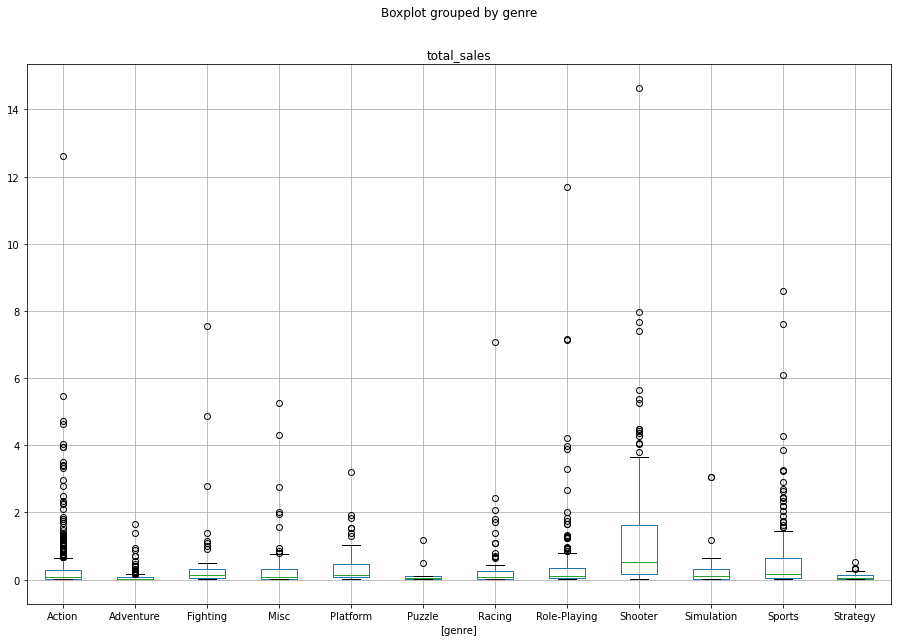

In [52]:
# строим диаграммы размаха для разных жанров
data_pred.boxplot(column='total_sales', by=['genre'], figsize=(15, 10));
#plt.ylim(0, 1.75)

(0.0, 1.63)

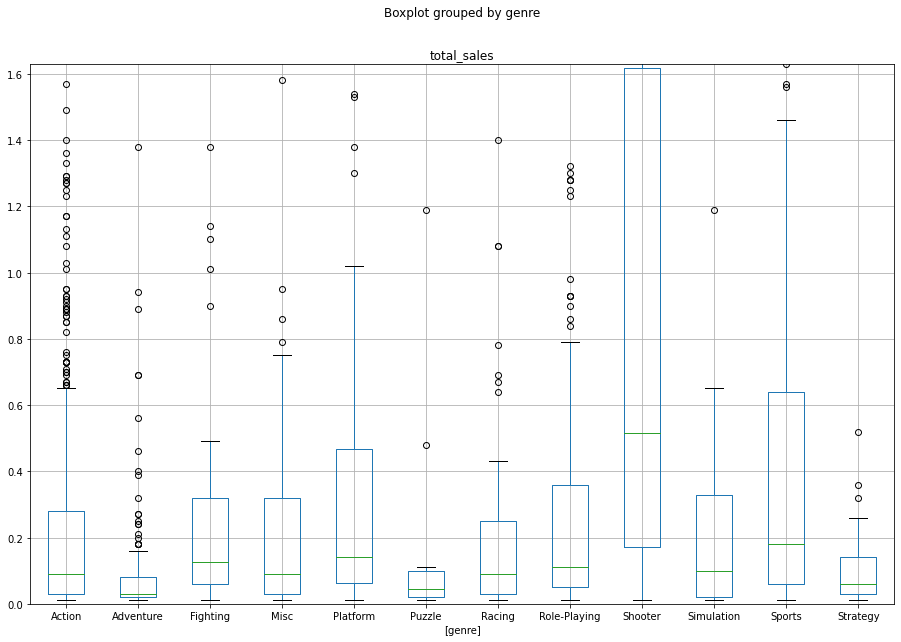

In [53]:
data_pred.boxplot(column='total_sales', by=['genre'], figsize=(15, 10));
plt.ylim(0, 1.63)

In [54]:
data_pred.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Adventure,185.0,0.094865,0.203147,0.01,0.0200,0.030,0.0800,1.66
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Puzzle,14.0,0.157857,0.320629,0.01,0.0200,0.045,0.1000,1.19
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63


In [55]:
# среднее количесвто выпущенных игр по жанрам
data_pred.groupby('genre')['total_sales'].count().mean()


140.75

<div class="alert alert-block alert-info">
<b> Наиболее высокие медианные продажи в жанре Shooter составляют 0.515 млн, при среднем количестве выпущенных игр (128). Тогда как максимальное количество игр за 2014-1016 года было выпущено в жанре Action, но медианные значения продаж в этом жанре одни из самых низких  0.09. Вторым по медианным продажам (0,18 млн) становится жанр Sports, в этом жанре была выпущена 161 игра за актуальный период. Также популярный жанр с медианными продажами 0,11 млн - Role-Playing 221.0, в котором вышло 221 игра. Таким образом, самыми прибыльными жанрами являются Shooter, Role-Playing и Sports. И самый стабильный жанр с наиболее длинным рядом, успешно продающихся, игр - жанр Shooter.

### Портрет пользователя каждого региона

#### Самые популярные платформы (топ-5)

<div class="alert alert-block alert-info">
<b> Создадим сводную таблицу суммы продаж популярных платформ для регионов Северной Америки, Европы, Японии. Для каждого региона построим круговую диаграмму, отражающую  доли популярности разных платформ. Также вычислим топ-5 самых популярных платформ и их доли в продажах.

In [56]:
# совдная таблица
data_platform_regions = data_pred.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'],\
                                              aggfunc='sum')
# считаем доли продаж для каждого региона
data_platform_regions = data_platform_regions/ data_platform_regions.sum()
data_platform_regions

,eu_sales,jp_sales,na_sales
platform,,,
3DS,0.059554,0.475239,0.079701
PC,0.066388,0.000000,0.025452
PS3,0.094355,0.120529,0.077624
PS4,0.480420,0.161349,0.347145
PSP,0.000000,0.003867,0.000000
PSV,0.013041,0.156193,0.008871
Wii,0.009568,0.000000,0.007322
WiiU,0.048581,0.078526,0.068155
X360,0.057226,0.000859,0.099627


In [57]:
# доли продаж по платформам для Северной Америки
data_platform_na = data_platform_regions['na_sales'].sort_values(ascending=False)

In [58]:
# вычислим топ-5 популярных платформ и их доли в общих продажах по Северной Америке
# доли остальных плаформ обьединим в Others
data_platform_na = data_platform_na.append(pd.Series(data_platform_na[5:].sum(),index=['Others']))\
                    .drop(index=(['WiiU', 'PC','PSV','Wii', 'PSP']))
data_platform_na

PS4       0.347145
XOne      0.286102
X360      0.099627
3DS       0.079701
PS3       0.077624
Others    0.109801
dtype: float64

In [59]:
# суммарная доля продаж пяти самых популярных платформ Северной Америки
data_platform_na.sum() - data_platform_na['Others']

0.8901992536788003

In [60]:
# доли продаж по платформам для Европы
data_platform_eu = data_platform_regions['eu_sales'].sort_values(ascending=False)

In [61]:
# вычислим топ-5 популярных платформ и их доли в общих продажах по Европе
# доли остальных плаформ обьединим в Others
data_platform_eu = data_platform_eu.append(pd.Series(data_platform_eu[5:].sum(),index=['Others']))\
                    .drop(index=(['WiiU', 'X360','PSV','Wii', 'PSP']))
data_platform_eu

PS4       0.480420
XOne      0.170866
PS3       0.094355
PC        0.066388
3DS       0.059554
Others    0.128417
dtype: float64

In [62]:
# суммарная доля продаж пяти самых популярных платформ Европы
data_platform_eu.sum() - data_platform_eu['Others']

0.8715826806561255

In [63]:
# доли продаж по платформам для Японии
data_platform_jp = data_platform_regions['jp_sales'].sort_values(ascending=False)

In [64]:
# вычислим топ-5 популярных платформ и их доли в общих продажах по Японии
# доли остальных плаформ обьединим в Others
data_platform_jp = data_platform_jp.append(pd.Series(data_platform_jp[5:].sum(),index=['Others']))\
                    .drop(index=(['XOne', 'X360','PC','Wii', 'PSP']))
data_platform_jp

3DS       0.475239
PS4       0.161349
PSV       0.156193
PS3       0.120529
WiiU      0.078526
Others    0.008164
dtype: float64

In [65]:
# суммарная доля продаж пяти самых популярных платформ Японии
data_platform_eu.sum() - data_platform_eu['Others']

0.8715826806561255

/tmp/ipykernel_215/171328309.py:14: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax[2].pie(data_platform_jp, labels = data_platform_jp.index, autopct='%1.1f%%', shadow=True)


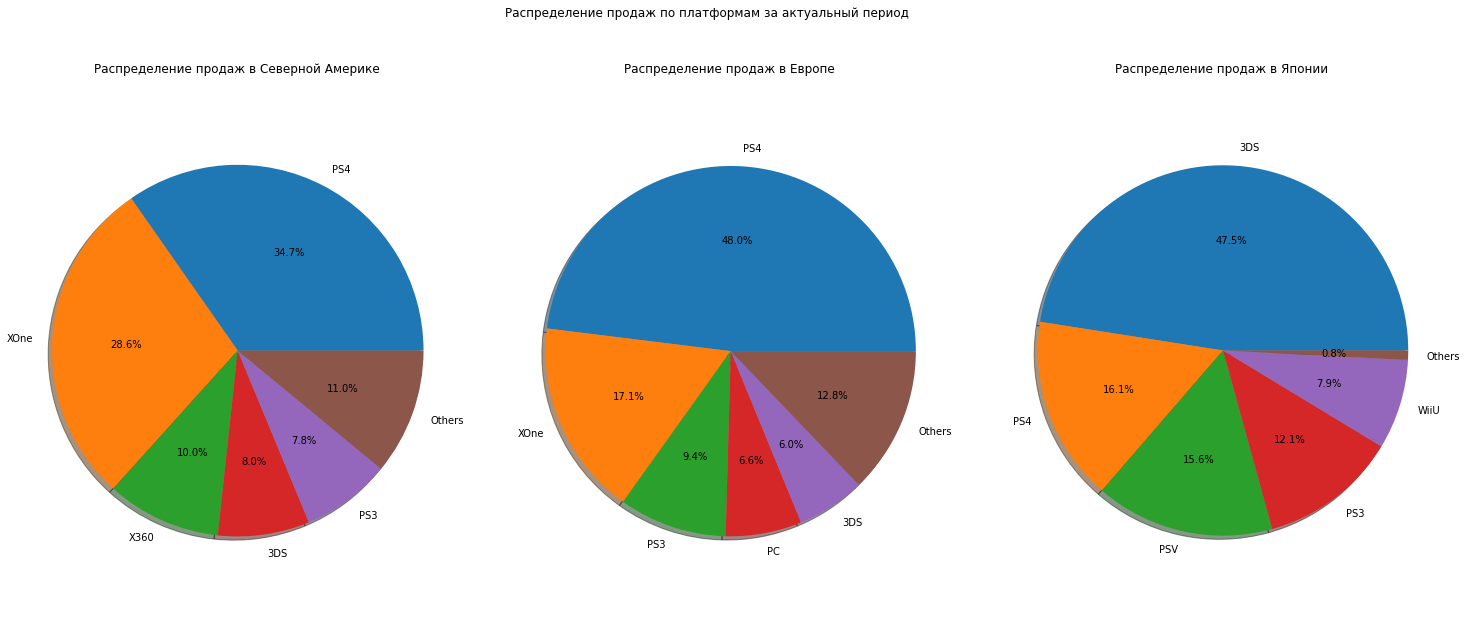

In [66]:
# Построим круговые диаграммы долей продаж по платформам для 3х регионов
fig, ax = plt.subplots(1, 3, figsize=(25, 10))

fig.suptitle('Распределение продаж по платформам за актуальный период')

ax[0].pie(data_platform_na, labels = data_platform_na.index, normalize=False, autopct='%1.1f%%', shadow=True)
ax[0].axis('equal')
ax[0].set_title('Распределение продаж в Северной Америке')

ax[1].pie(data_platform_eu, labels = data_platform_eu.index, autopct='%1.1f%%', shadow=True)
ax[1].axis('equal')
ax[1].set_title('Распределение продаж в Европе')

ax[2].pie(data_platform_jp, labels = data_platform_jp.index, autopct='%1.1f%%', shadow=True)
ax[2].axis('equal')
ax[2].set_title('Распределение продаж в Японии')


plt.show()

<div class="alert alert-block alert-info">
<b> По круговой диаграмме и отсортированной сводной таблице получаем, что наиболее популярные платформы в Северной Америке следующие: PS4 (34,7 % от всех продаж), XOne (28,6 % от всех продаж), X360 (10 % от всех продаж), PS3 (7,8 % от всех продаж), 3DS (8 % от всех продаж). Суммарная доля продаж на платформах, не входящих в топ-5 самых популярных, составляет 11 % от общей доли продаж.

<div class="alert alert-block alert-info">
<b> По круговой диаграмме и отсортированной сводной таблице получаем, что наиболее популярные платформы в Европе следующие: PS4 (48 % от всех продаж), XOne (17,1 % от всех продаж), PS3 (9,4 % от всех продаж), PC (6,6 % от всех продаж), 3DS (6 % от всех продаж). Суммарная доля продаж на платформах, не входящих в топ-5 самых популярных, составляет 12,8 % от общей доли продаж.

<div class="alert alert-block alert-info">
<b> По круговой диаграмме и отсортированной сводной таблице получаем, что наиболее популярные платформы в Японии следующие: 3DS (47,5 % от всех продаж), PS4 (16,1 % от всех продаж), PSV (15,6 % от всех продаж), PS3 (12,1 % от всех продаж), WiiU (7,9 % от всех продаж). Суммарная доля продаж на платформах, не входящих в топ-5 самых популярных, составляет 0,8 % от общей доли продаж.

<div class="alert alert-block alert-info">
<b> Распределение долей продаж по платформам показало, что в Северной Америке и Европе топ-5 папулярных платформ практические одинаковы, лидируют PS4 и XOne, в Японии же значительно лидирует платформа 3DS. Платформа PS4 находится в топе папулярных платформ среди всех регионов. Вторая по количеству продаж в Северной Америке и Европе платформа XOne в Японии занимает только 7е место

#### Самые популярные жанры (топ-5).

<div class="alert alert-block alert-info">
<b> Создадим сводную таблицу суммы продаж в завиисимости от жанра для регионов Северной Америки, Европы, Японии. Для каждого региона построим распределение продаж по жанрам. Также вычислим топ-5 самых популярных жанров.

In [67]:
# сводная таблица
data_genre_regions = data_pred.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
data_genre_regions

,eu_sales,jp_sales,na_sales
genre,,,
Action,74.68,29.58,72.53
Adventure,6.49,3.60,5.64
Fighting,6.69,6.37,12.43
Misc,12.86,5.61,15.05
Platform,6.80,2.69,6.79
Puzzle,0.52,0.93,0.65
Racing,14.13,1.76,8.74
Role-Playing,28.17,31.16,33.47
Shooter,65.52,4.87,79.02


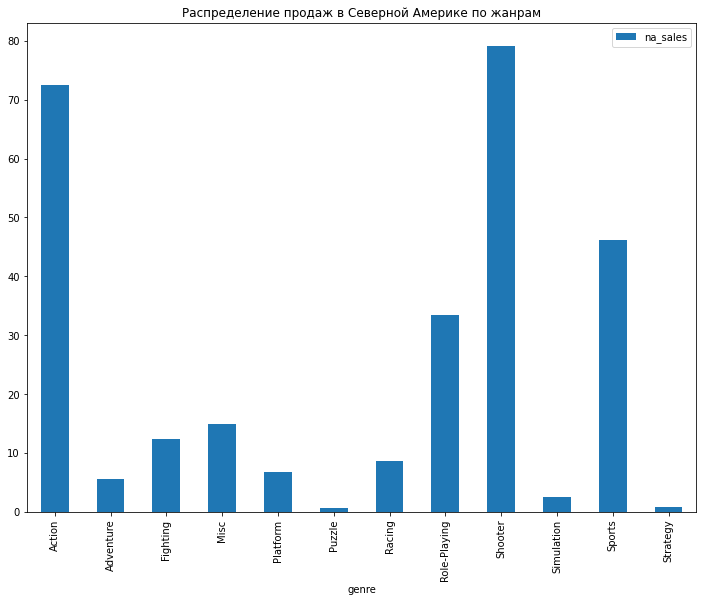

In [68]:
# диаграмма распределения продаж в Северной Америке по жанрам
ax = data_genre_regions.plot(kind='bar',y = 'na_sales', figsize=(12, 9))
ax.set_title('Распределение продаж в Северной Америке по жанрам')
plt.show()

In [69]:
# топ-5 самых популярных жанров в Северной Америке
data_genre_regions['na_sales'].sort_values(ascending=False)[0:5]

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

<div class="alert alert-block alert-info">
<b> Топ-5 самых популярных жанров в Северной Америке: Shooter (79.02 млн продаж),Action (72.53 млн продаж), Sports (46.13 млн продаж), Role-Playing (33.47 млн продаж), Misc (15.05 млн продаж).

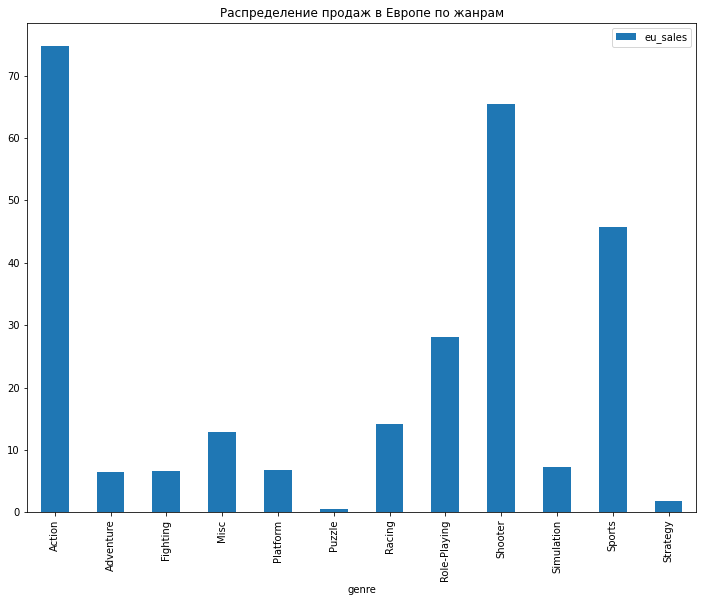

In [70]:
# диаграмма распределения продаж в Европе по жанрам
ax = data_genre_regions.plot(kind='bar',y = 'eu_sales', figsize=(12, 9))
ax.set_title('Распределение продаж в Европе по жанрам')
plt.show()

In [71]:
# топ-5 самых популярных жанров в Европе
data_genre_regions['eu_sales'].sort_values(ascending=False)[0:5]

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

<div class="alert alert-block alert-info">
<b> Топ-5 самых популярных жанров в Европе: Action (74.68 млн продаж), Shooter (65.52 млн продаж), Sports (45.73 млн продаж), Role-Playing (28.17 млн продаж), Racing (14.13 млн продаж).

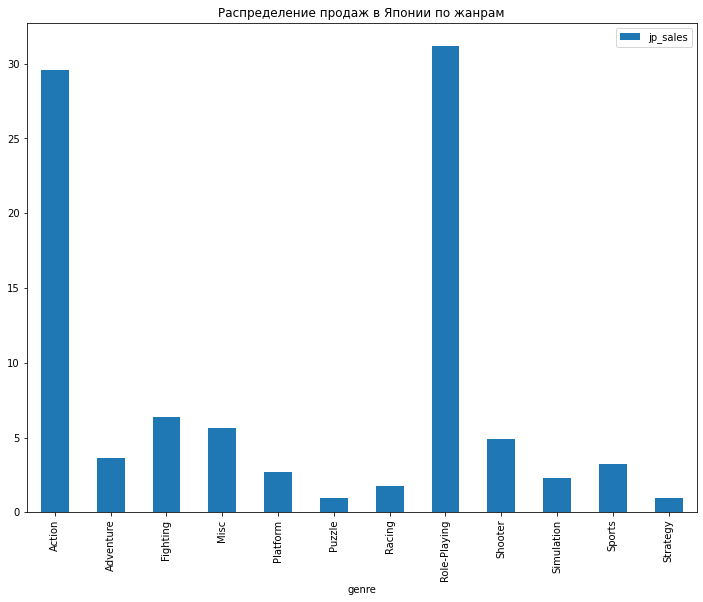

In [72]:
# топ-5 самых популярных жанров в Японии
ax = data_genre_regions.plot(kind='bar',y = 'jp_sales', figsize=(12, 9))
ax.set_title('Распределение продаж в Японии по жанрам')
plt.show()

In [73]:
# топ-5 самых популярных жанров в Японии
data_genre_regions['jp_sales'].sort_values(ascending=False)[0:5]

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

<div class="alert alert-block alert-info">
<b> Топ-5 самых популярных жанров в Европе: Role-Playing (31.16 млн продаж), Action (29.58 млн продаж), Fighting (6.37 млн продаж), Misc (5.61 млн продаж), Shooter (4.87 млн продаж).

<div class="alert alert-block alert-info">
<b> Популярные жанры в Северной Америке и Европе очень похожи, скорее всего это связано с близостью культур и распространненностью таких платформ, как PS4, XOne. В Японии наиболее популярные жанры сильно отличаются от европейских и северо-американских. Здесь преобладает жанр Role-Playing и Action , скорее всего такое предпочтение в жанрах связано с широкой распространенностью платформы 3DS, на которой выходит большинство игр именно в жанре Role-Playing.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [74]:
# сводная таблица суммы продаж по рейтингу ESRB
data_rating_region = data_pred.pivot_table(index='rating',
                                          values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
data_rating_region

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
nd,58.95,56.90,64.72


In [75]:
# сводная таблица долей продаж 
data_rating_region['na_sales'] = data_rating_region['na_sales'] / data_rating_region['na_sales'].sum()
data_rating_region['eu_sales'] = data_rating_region['eu_sales'] / data_rating_region['eu_sales'].sum()
data_rating_region['jp_sales'] = data_rating_region['jp_sales'] / data_rating_region['jp_sales'].sum()
data_rating_region

,eu_sales,jp_sales,na_sales
rating,,,
E,0.214497,0.096036,0.178624
E10+,0.096645,0.047911,0.116982
M,0.345205,0.086046,0.339435
T,0.125868,0.158771,0.137119
nd,0.217785,0.611236,0.227839


<div class="alert alert-block alert-info">
<b> Рэйтинг возрастных категорий:
<br> E - Подходит для всех возрастных категорий.
<br> E 10+ -	Подходит для лиц старше 10 лет. 
<br> M -	Подходит для лиц старше 17 лет.
<br> T -	Подходит для лиц старше 13 лет.
<br> Для стран Европы получаем, что самая большая доля продаж - это игры для лиц старше 17 или для любых возрастных категорий (E, M). Для Северной Америке ситуцация похожая, здесь также самая большая доля продаж - это игры для лиц старше 17 или для любых возрастных категорий (E, M). То есть, для стран Северной Америки и Европы рейтинг ESRB влияет на покупку игры. В Японии большинство проданных игр (61%) не классифицированы рейтингом ESRB, поэтому можем заключить, что здесь ранжирование игр по возрастным ограничениям не влияет на продажи.     

### Проверка гипотез

#### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Формулируем нулевую (двустороннюю) и альтернативную гипотезы:

H_0: Средний пользовательский рейтинг (user_score) платформы Xbox One = Средний пользовательский рейтинг (user_score) платформы PC

H_1: Средний пользовательский рейтинг (user_score) платформы Xbox One ≠ Средний пользовательский рейтинг (user_score) платформы PC

alpha = 0.05

In [76]:
# фильтруем данные
# данные берем за актуальный период 2014-2016
mean_rating_xboxone = data_pred.loc[data_pred['platform'] == 'XOne', 'user_score' ]
mean_rating_pc = data_pred.loc[data_pred['platform'] == 'PC', 'user_score' ]

In [77]:
# вызов метода для проверки гипотезы
results = st.ttest_ind(mean_rating_xboxone, mean_rating_pc, equal_var = False )
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.050744739458492595
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-block alert-info">
<b> Получаем, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, поскольку вероятность получить то среднее, которое имеется в выборочных данных, больше уровня статистической значимости alpha (5%)

In [78]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


#### Средние пользовательские рейтинги жанров Action и Sports разные

Формулируем нулевую (двустороннюю) и альтернативную гипотезы:

H_0: Средний пользовательский рейтинг (user_score) жанра Action = Средний пользовательский рейтинг (user_score) жанра Sports

H_1: Средний пользовательский рейтинг (user_score) жанра Action ≠ Средний пользовательский рейтинг (user_score) жанра Sports

alpha = 0.05

In [79]:
# фильтруем данные
# данные берем за актуальный период 2014-2016
mean_rating_action = data_pred.loc[data_pred['genre'] == 'Action', 'user_score' ]
mean_rating_sports = data_pred.loc[data_pred['genre'] == 'Sports', 'user_score' ]

In [80]:
# вызов метода для проверки гипотезы
results = st.ttest_ind(mean_rating_action, mean_rating_sports, equal_var = False )
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

7.412639945317563e-17
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-info">
<b> Получаем, что средние пользовательские рейтинги жанров Action и Sports разные, поскольку вероятность получить то среднее, которое имеется в выборочных данных, меньше уровня статистической значимости alpha (5%)

### Общий вывод
Подведем итоги
#### Предобратка данных
На этапе предобратки данных были заменены названия столбцов (приведены к нижнему регистру), данные преобразованы в нужные типы. Обработаны пропуски: в столбцах 'name', 'year_of_release', 'genre' пропуски в этих категориальных переменных невозможно чем-то заполнить, поэтому избавились от таких строк с пропусками. Пропуски в количественных переменных заполнили на медианные значения по категориям. Были посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.

#### Исследовательский анализ
На этапе исследовательского анализа данных выяснили, что рост в производстве игр начинался в 1993 году, это вполне логично, ведь начали появляться новые платформы (консоли). А пик в колчистве выпущенных игр наблюдается в 2008-2009 годах. С 2012 по 2016 можем наблюдать неравномерное снижение выпущенных игр.

Также платформы с наибольшими суммарными продажами за весь период (1985-2016 года): 'PS2','X360', 'Wii', 'PS3', 'DS', 'PS'.

По диаграммам распределения опрежелили, что срок жизни платформы составляет от 10 до 12 лет, в среднем получается около 11. 

Для того, чтобы построить корректный прогноз на 2017 год, следует определить актуальный период. Информация об устаревших платформах, таких как PS, на которых больше не выпускают игры, нам не интересна, при этом нам надо собрать достаточно данных, чтобы провести адекватную оценку следующеего года. Для такой динамично меняющейся индустрии, как игровая, было бы достаточно взять данные только за 2016 год, но данные за 2016 не полные. Поэтому предлагаю взять интервал с 2014 - 2016 год для прогнозирования продаж. 

На графике распределения суммы продаж по платформам за 2014-2016 года можно отметить 7 платформ - лидеров по прадажам: PS4, XOne, 3DS, WiiU,X360, PS3, PC.

На графике распределения суммы продаж по платформам за 2014-2016 года можно увидеть, как изменялись продажи крупных платформ за актуальный период. Явными лидерами продаж на 2016 год становятся платформы PS4 и XOne.   
Платформы X360 и PS3 были выпущены в 2006 и 2005 годах, и с 2014 по 2015 продажи на этих платформах значительно уменьшаются, их вытесняют платформы PS4 и XOne. Продажи на PC стабильны c 2014 по 2015 год, эту платформу стоит рассматривать, как перспективную. Также отметим, что с 2015-2016 года в тройку лидеров входит платформа 3DS. Таким образом, получаем следующие потенциально прибыльные платформы: PS4, XOne, 3DS, PC. 

По диаграммам размаха и числовым описаниям, можем сказать наибольшее количество игр за 2014-2016 года вышло на платформе PS4 (376 игры) и PSV (295 игр). При этом второе наибольшее значение медианных продаж у PS4 (0,185 млн), тогда как медианные продажи платформы PSV составляют всего лишь 0.04 млн, и это одно из наименьших колисчтва продаж среди всех платформ. Наибольшее медианное значение продаж у XOne (0.205 млн), хотя за этот период игр вышло в более, чем в 1,5 раза меньшне (228 игр) по сравнению с PS4. Наименьшее колчество продаж на платформе PSP 0.020 млн.

По диаграммам рассеивания и коэфициентам корреляции между отзывами и продажами на платформах PS4 и XOne можно сделать вывод о том, что при оценках критиков больше 70 прослеживается зависимость между высокой оценкой от критика и увеличением продаж. А оценки пользователей на продажи не влияют. 

Также построила распределение продаж по жанрам на популярных платформах 2014-2016. И получилось, что самыми прибыльными жанрами являются Shooter, Role-Playing и Sports. А самый стабильный жанр с наиболее длинным рядом, успешно продающихся, игр - жанр Shooter.

#### Портрет пользователя каждого региона
Была создана сводная таблицы для определения долей самых популярных платформ для регионов Северной Америки, Европы, Японии. Для каждого региона построена круговая диаграмма, отражающая доли популярности разных платформ.

Распределение долей продаж по платформам показало, что в Северной Америке и Европе топ-5 папулярных платформ практические одинаковы, лидируют PS4 и XOne, в Японии же значительно лидирует платформа 3DS. Платформа PS4 находится в топе папулярных платформ среди всех регионов. Вторая по количеству продаж в Северной Америке и Европе платформа XOne в Японии занимает только 7е место.

Для оперделения самых популярных жанров в разных регионах также была создана сводная таблица и построены столбчатые диаграммы сумм продаж.

Популярные жанры в Северной Америке и Европе очень похожи, скорее всего это связано с близостью культур и распространненностью таких платформ, как PS4, XOne. В Японии наиболее популярные жанры сильно отличаются от европейских и северо-американских. Здесь преобладает жанр Role-Playing и Action , скорее всего такое предпочтение в жанрах связано с широкой распространенностью платформы 3DS, на которой выходит большинство игр именно в жанре Role-Playing.

Также выяснили, что для стран Северной Америки и Европы рейтинг ESRB влияет на покупку игры. В Японии большинство проданных игр (61%) не классифицированы рейтингом ESRB, поэтому можем заключить, что здесь ранжирование игр по возрастным ограничениям не влияет на продажи. 

#### Проверка гипотез
Выяснила, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые и редние пользовательские рейтинги жанров Action и Sports разные

